# K-Means Fun

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import cluster
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/seeds.csv')

print(df.shape)
df.head()

(210, 8)


,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### EDA

In [9]:
# Check for Nans and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area               210 non-null float64
perimeter          210 non-null float64
compactness        210 non-null float64
length             210 non-null float64
width              210 non-null float64
asymmetry_coeff    210 non-null float64
groove_length      210 non-null float64
species            210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [10]:
# Unique species and value counts
df.species.value_counts()

[1 2 3]


3    70
2    70
1    70
Name: species, dtype: int64

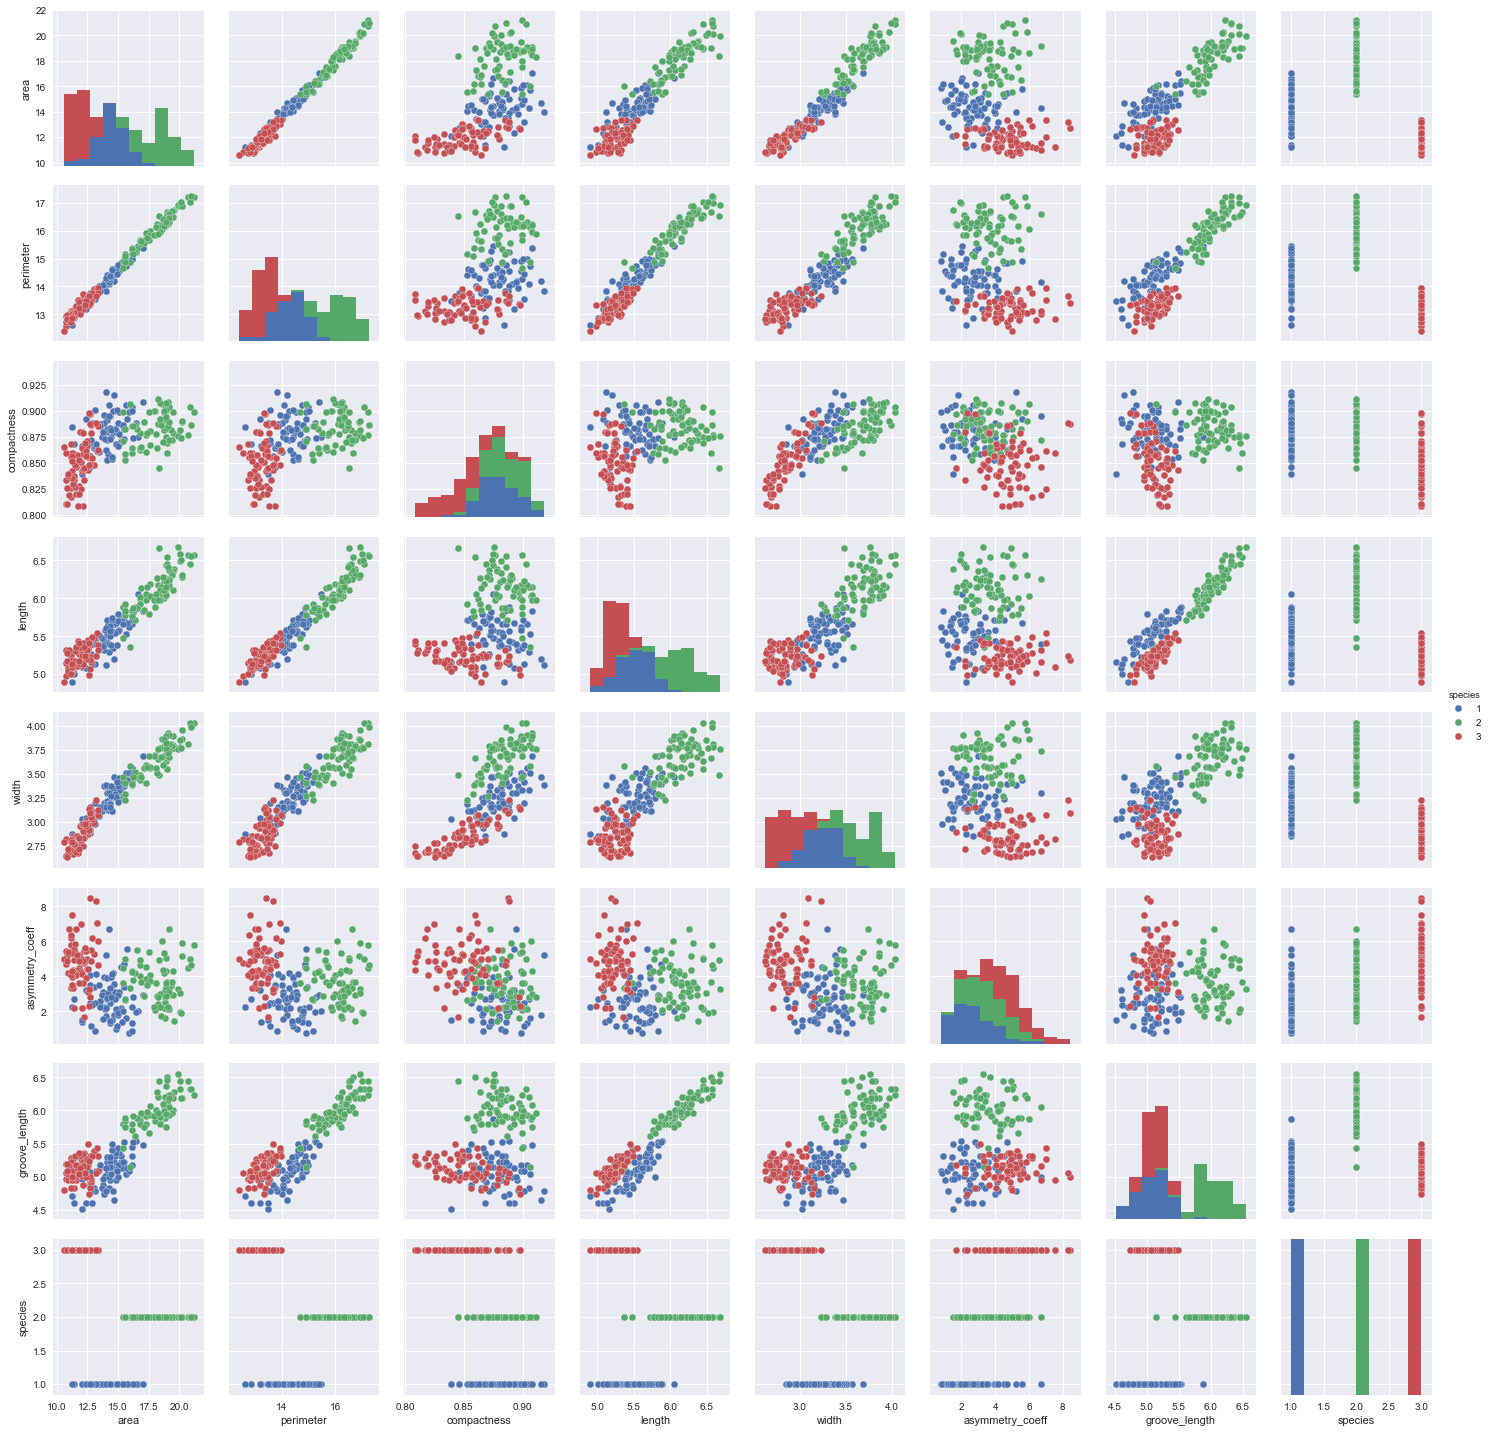

In [8]:
# See distributions/relationships with species labels
sns.pairplot(df, hue='species')

There looks to be very good seperation is species in the pairplot. This looks like an appropriate dataset to use k-means. Just as a note, DBSCAN doesn't look to be a good clustering algorithm to use here as it would have a hard time seperating the clusters as they are tightly bound together.

In [11]:
# Create feature matrix and target vector
X = df.drop('species', axis=1)
y = df.species

# I would usually scale the data here, but as the dataset doesn't look
# to contain outliers, I deem it unnecessary for this clustering problem.


### Modeling
We're going to exclusively use k-means in this notebook. K-means is an unsupervised clustering algorithm where the goal is to split the data into groups (or clusters) such that the total sum of squared distances from each point to the mean point of the cluster is minimized. <br/><br/>
We know there are 3 classes in this example, however, to demonstrate k-means let's assume we don't know that. Let's first start with 8 clusters and evaluate the results.

In [21]:
# Instantiate and fit k-means model
km8 = KMeans(n_clusters=8)
km8.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [22]:
# Unique clusters
set(km8.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [23]:
# Silhouette score
silhouette_score(X, km8.labels_)

0.36207442918502875

With a silhouette score of 0.36, honestly it's not too bad.

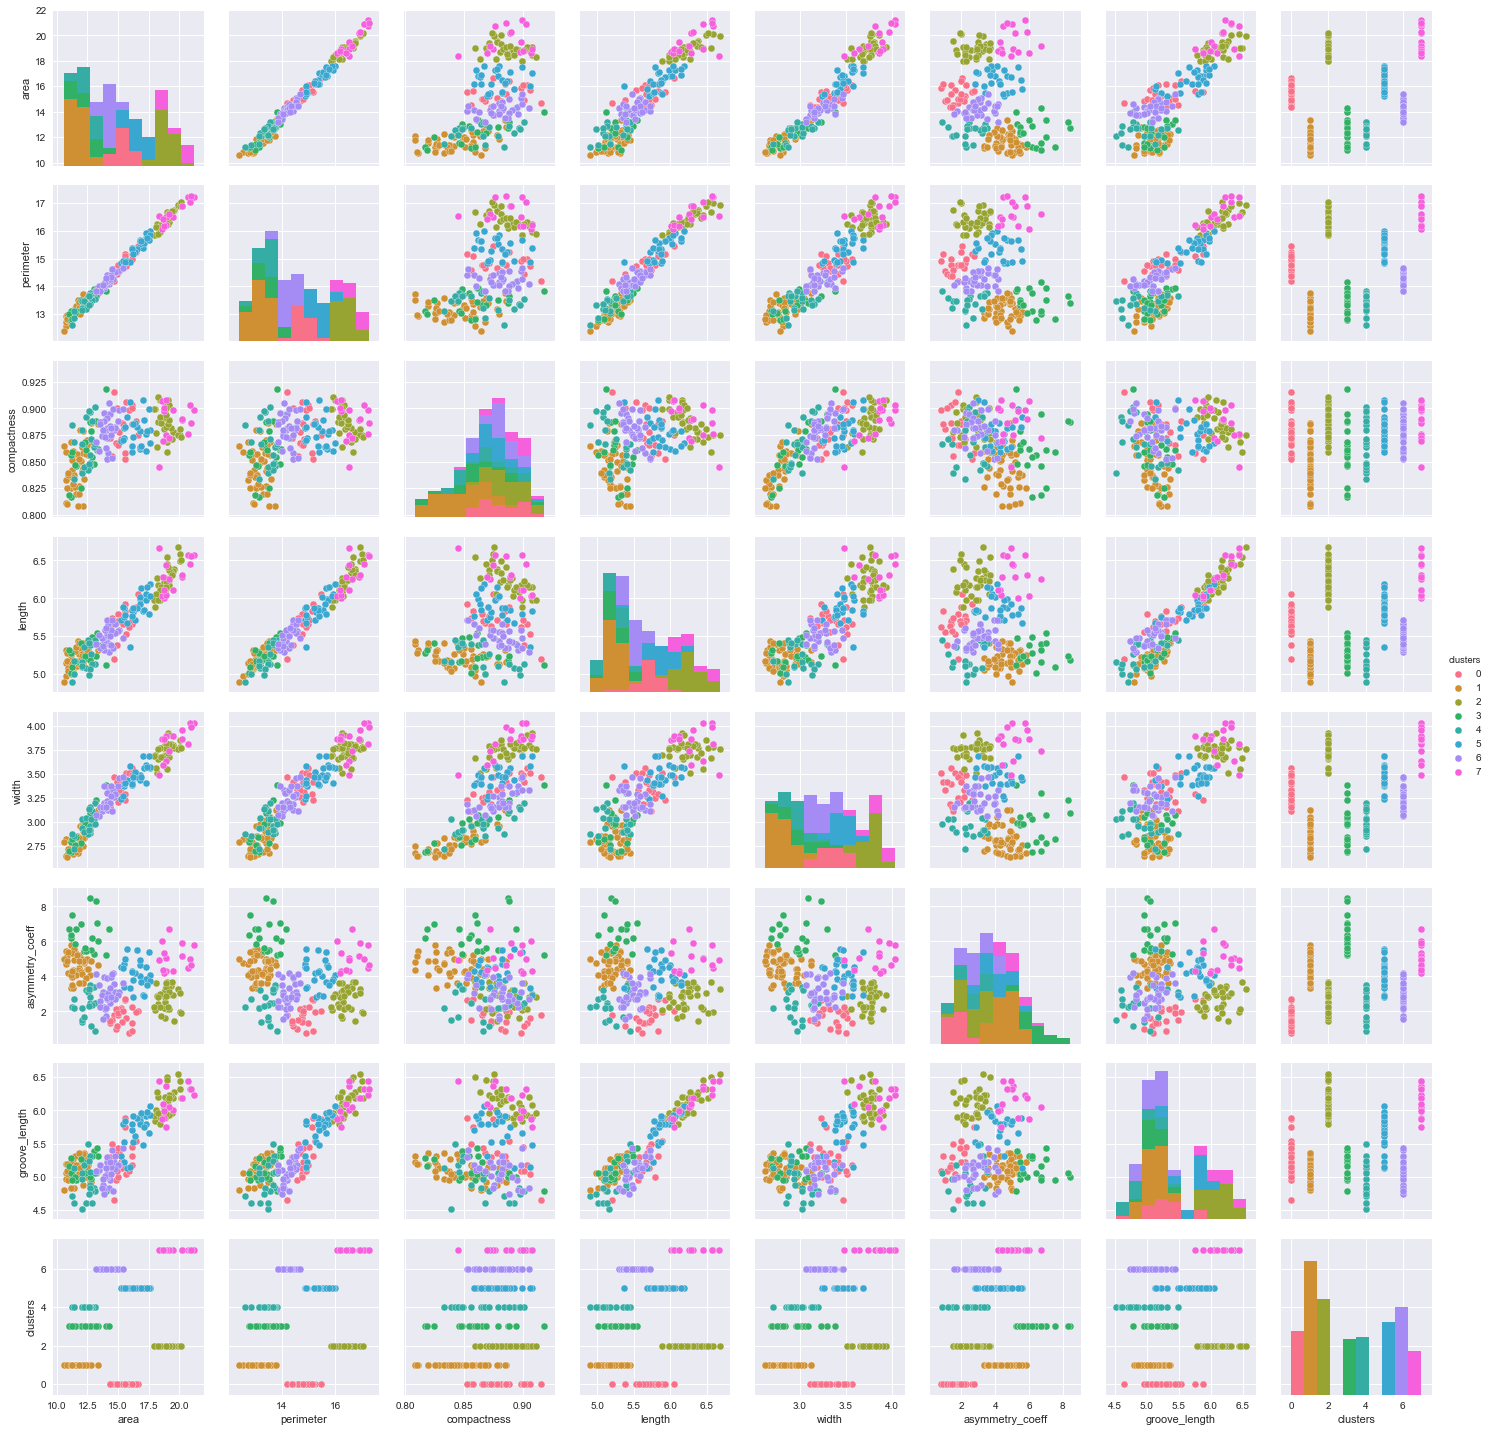

In [24]:
# Examine clusters with pairplot
df_km8 = df.drop('species', axis=1)
df_km8['clusters'] = km8.labels_

sns.pairplot(df_km8, hue='clusters')

Let's re-run the model with 2 clusters and compare.

Unique Clusters:  {0, 1}
Silhouette Score:  0.519447565388


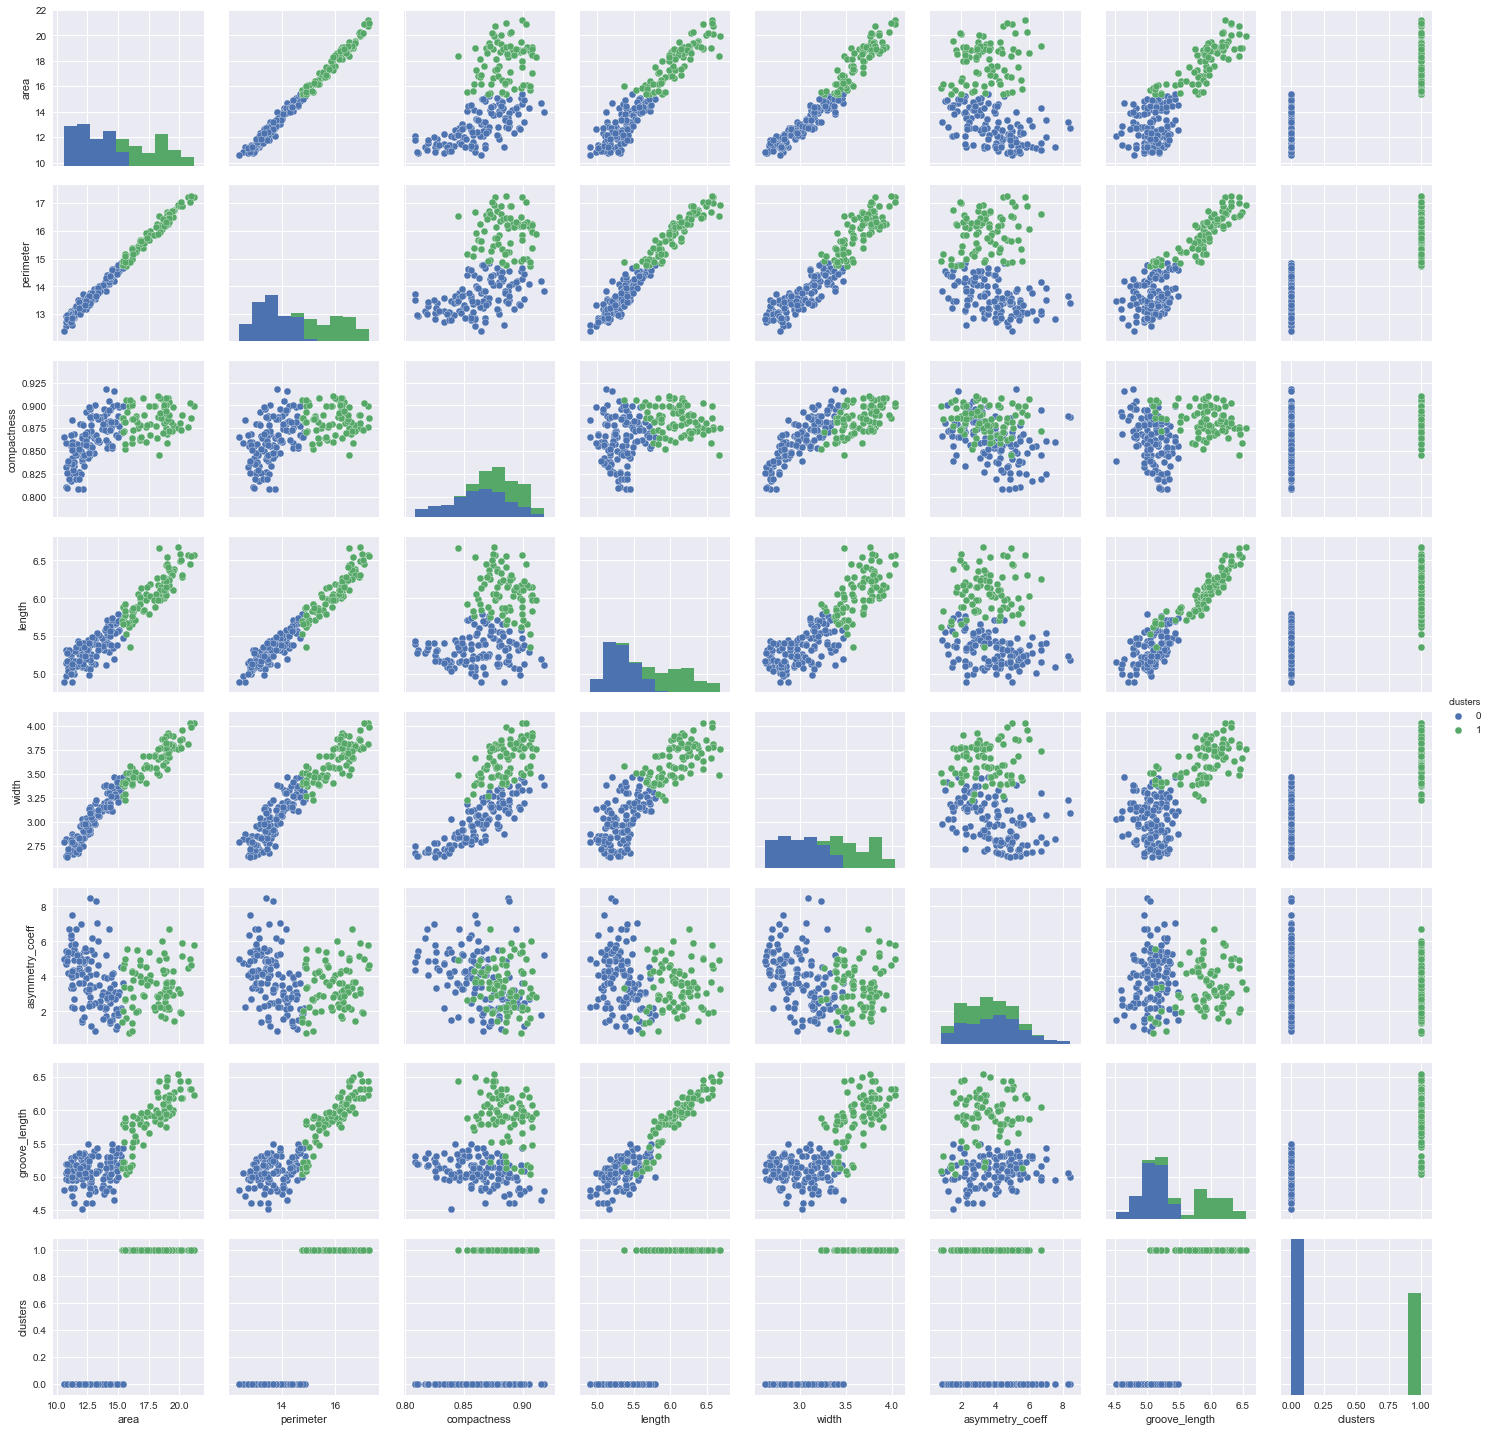

In [28]:
# Instantiate and fit with n_clusters=2
km2 = KMeans(n_clusters=2)
km2.fit(X)

# Unique clusters
print('Unique Clusters: ', set(km2.labels_))

# Silhouette score
print('Silhouette Score: ', silhouette_score(X, km2.labels_))

# Examine clusters with pairplot
df_km2 = df.drop('species', axis=1)
df_km2['clusters'] = km2.labels_

sns.pairplot(df_km2, hue='clusters')

The silhouette score got a good boost with 2 clusters. <br/><br/>
Finally let's re-run the model with 3 clusters.

Unique Clusters:  {0, 1, 2}
Silhouette Score:  0.471933731913


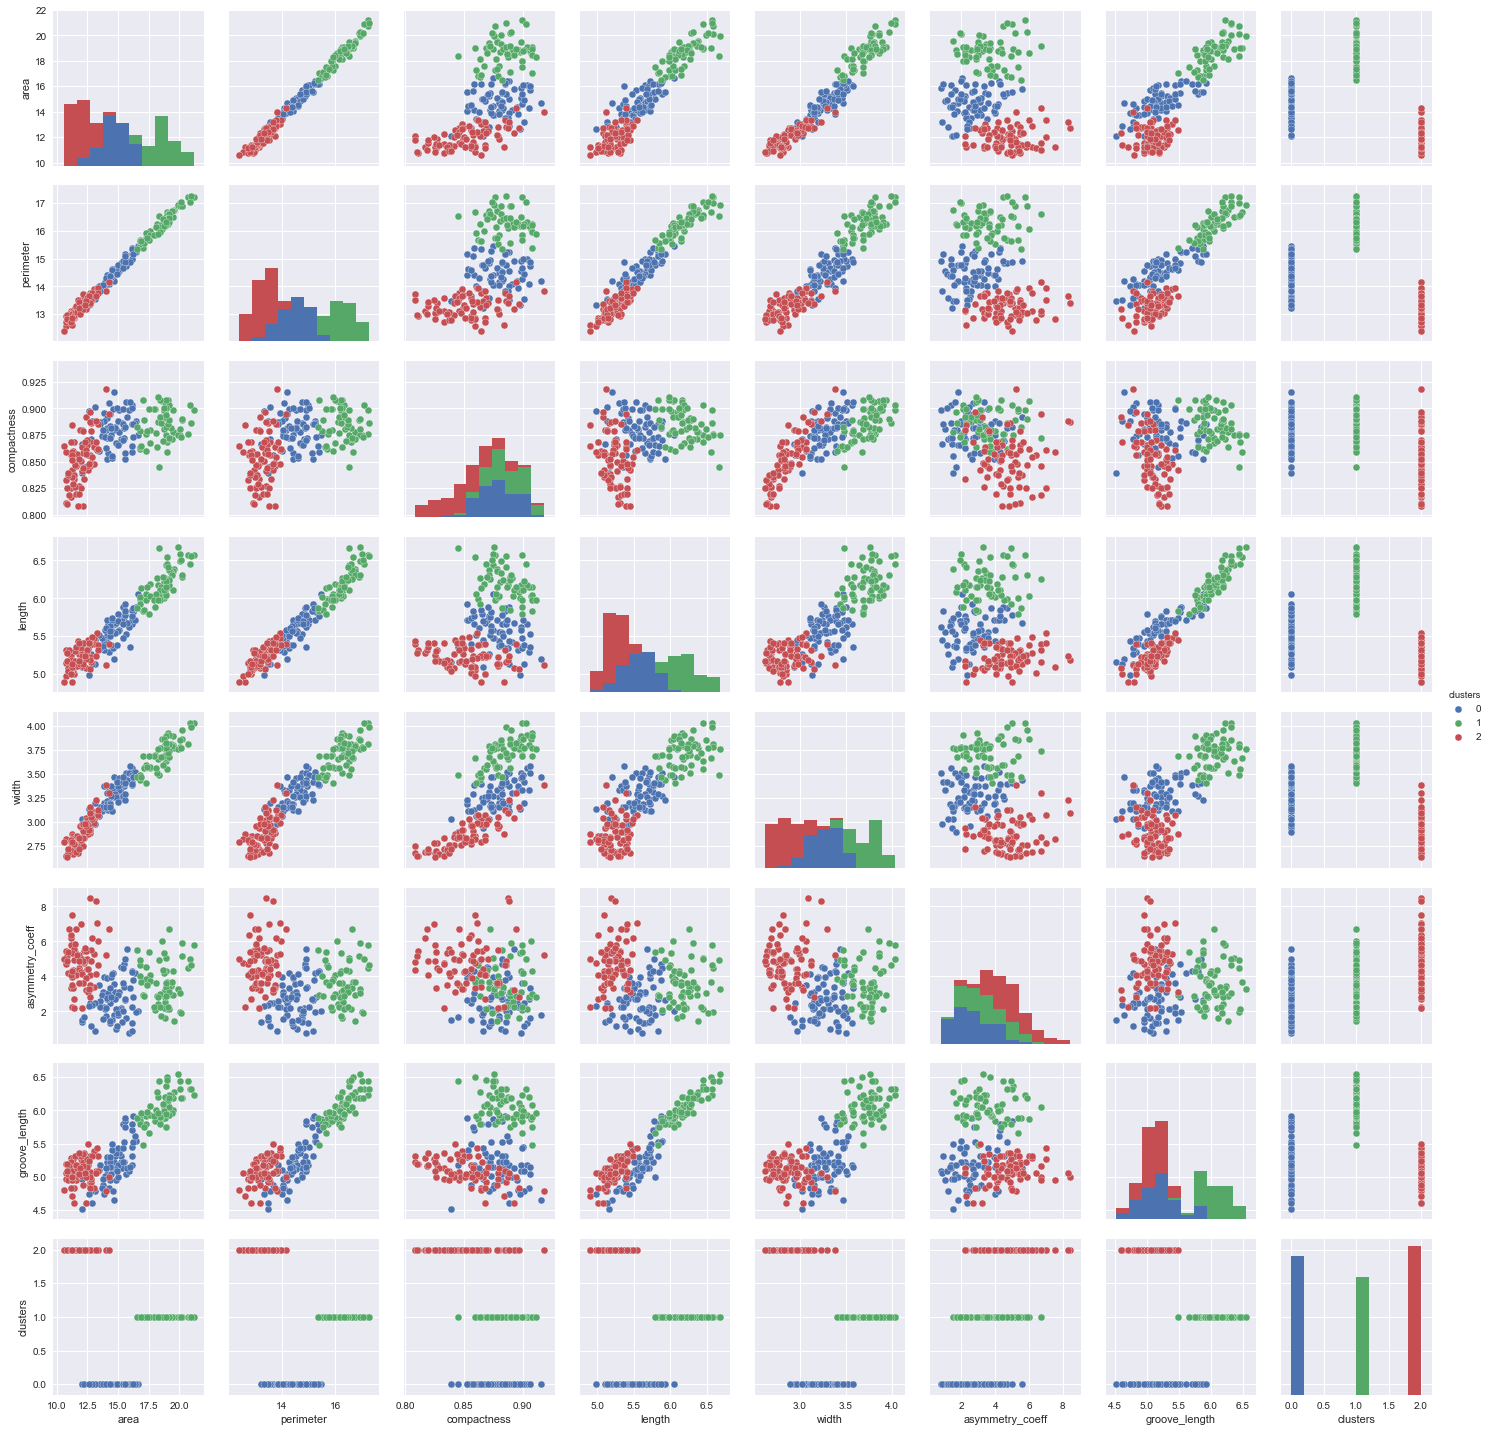

In [29]:
# Instantiate and fit with n_clusters=3
km3 = KMeans(n_clusters=3)
km3.fit(X)

# Unique clusters
print('Unique Clusters: ', set(km3.labels_))

# Silhouette score
print('Silhouette Score: ', silhouette_score(X, km3.labels_))

# Examine clusters with pairplot
df_km3 = df.drop('species', axis=1)
df_km3['clusters'] = km3.labels_

sns.pairplot(df_km3, hue='clusters')

Surprisingly n_clusters=2 had a higher silhouette score than n_clusters3 (even when we know there are 3 clusters we were looking for). This is a good example of a case where the silhouette score may be untrustworthy to evaluate the number of clusters. As this is an unsupervised model, it can lead to conclusions that as humans we know may not be true.